<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/AML_Assessment_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA PROCESSING FOR MACHINE LEARNING##

In [2]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.1 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#  load and view the first 5 rows
df_auto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')


**Detect and Deal with Errorneous Values**

In [6]:
# Inspect dataframe
df_auto.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


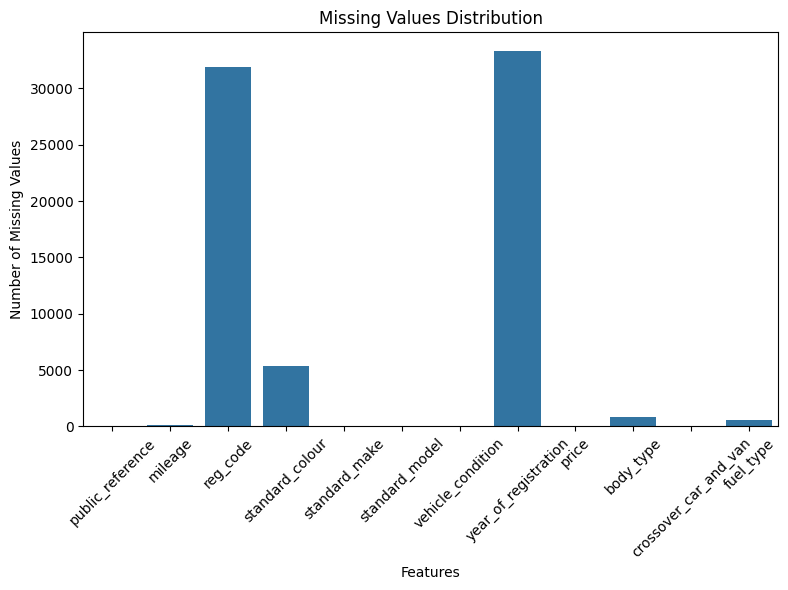

In [13]:
# Check for missing values in the DataFrame
missing_values = df_auto.isnull().sum()

# Visualize the missing values using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values Distribution')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
# get dataframe info
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [34]:
# Statistically describe numerical features
df_auto.describe().T

,count,mean,std,min,25%,50%,75%,max
public_reference,402005.0,2.020071e+14,1.691662e+10,2.013072e+14,2.020090e+14,2.020093e+14,2.020102e+14,2.020110e+14
mileage,401878.0,3.774360e+04,3.483172e+04,0.000000e+00,1.048100e+04,2.862950e+04,5.687575e+04,9.999990e+05
year_of_registration,368694.0,2.015006e+03,7.962667e+00,9.990000e+02,2.013000e+03,2.016000e+03,2.018000e+03,2.020000e+03
price,402005.0,1.734197e+04,4.643746e+04,1.200000e+02,7.495000e+03,1.260000e+04,2.000000e+04,9.999999e+06


In [15]:
df_auto[df_auto["mileage"] == 0.0].head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
45,202003318812338,0.0,NaN,Grey,Volvo,S60,NEW,NaN,40264,Saloon,False,Petrol


In [54]:
# Get unique values and counts
reg_year_code_count = df_auto[["reg_code", "year_of_registration"]].value_counts()
reg_year_code_count

reg_code  year_of_registration
17        2017.0                  36560
67        2017.0                  27781
18        2018.0                  21490
66        2016.0                  20686
16        2016.0                  19908
                                  ...  
59        2020.0                      1
61        1961.0                      1
          2014.0                      1
          2018.0                      1
s         2001.0                      1
Name: count, Length: 283, dtype: int64

In [27]:
# Get unique values and counts
cat_features_df = df_auto.drop(columns=['public_reference', 'mileage', 'year_of_registration', 'price'])
counts = cat_features_df.value_counts()
counts

reg_code  standard_colour  standard_make  standard_model  vehicle_condition  body_type    crossover_car_and_van  fuel_type
17        Black            Volkswagen     Polo            USED               Hatchback    False                  Petrol       252
          White            Volkswagen     Polo            USED               Hatchback    False                  Petrol       190
67        Red              Toyota         AYGO            USED               Hatchback    False                  Petrol       187
          Blue             Nissan         Qashqai         USED               SUV          False                  Petrol       181
          Black            Volkswagen     Polo            USED               Hatchback    False                  Petrol       178
                                                                                                                             ... 
53        Grey             MINI           Hatch           USED               Hatchback    False  

In [ ]:
# Box plots for numerical features.

Observation
- The data frame contained some missing values in mileage, reg_code, standard_colour, year_of_registration, body_type, and fuel_type features.
- Some of these missing values were due to new cars whose mileage, reg_code, and year_of_registration were recorded as zero and “NaN” (not a number) respectively.
- There were also some errors in the year_of_registration and the reg_code.
- Mileage is positively skewed with outliers as shown by its descriptive statistics and boxplot.
- Year-of-registration is negatively skewed with outliers as shown by its descriptive statistics and boxplot.

